In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression as LR, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Importing dataset

data = pd.read_csv('datasets/Project_8_Avocado.csv')

In [3]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.shape

(18249, 14)

In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In dataset, Type and region is having object data type. 

Also date is in object type not in datetime or date type

Will convert it further.

In [8]:
#Checking for null values is any

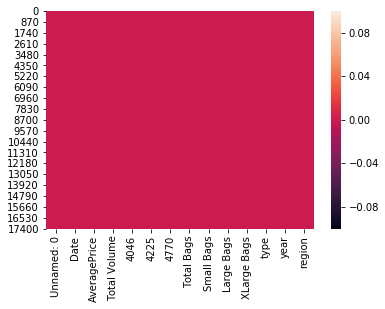

In [9]:
sns.heatmap(data.isnull())

There is not null values present in dataset

In [10]:
#removind unnamed col from dataset

data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [11]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [12]:
#Convertind date from obj to date

data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [14]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
#There are two types are pesent for type 

In [16]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

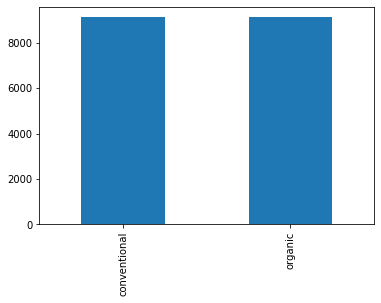

conventional    9126
organic         9123
Name: type, dtype: int64

In [17]:
data.type.value_counts().plot(kind = 'bar')
plt.show()
data.type.value_counts()

##### Average price of Avocado with respect to avocado type i.e. Organic and Conventional

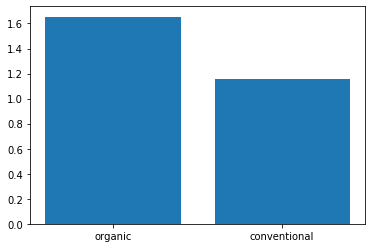

In [18]:
index = np.arange(2)
objects = ['organic','conventional']
plt.bar(index,[data[data.type == "organic"].AveragePrice.mean(), data[data.type == "conventional"].AveragePrice.mean()])
plt.xticks(index,objects)
plt.show()

Organic avocado have more average price than conventional avocado

##### Average price of Conventional Avocados over time

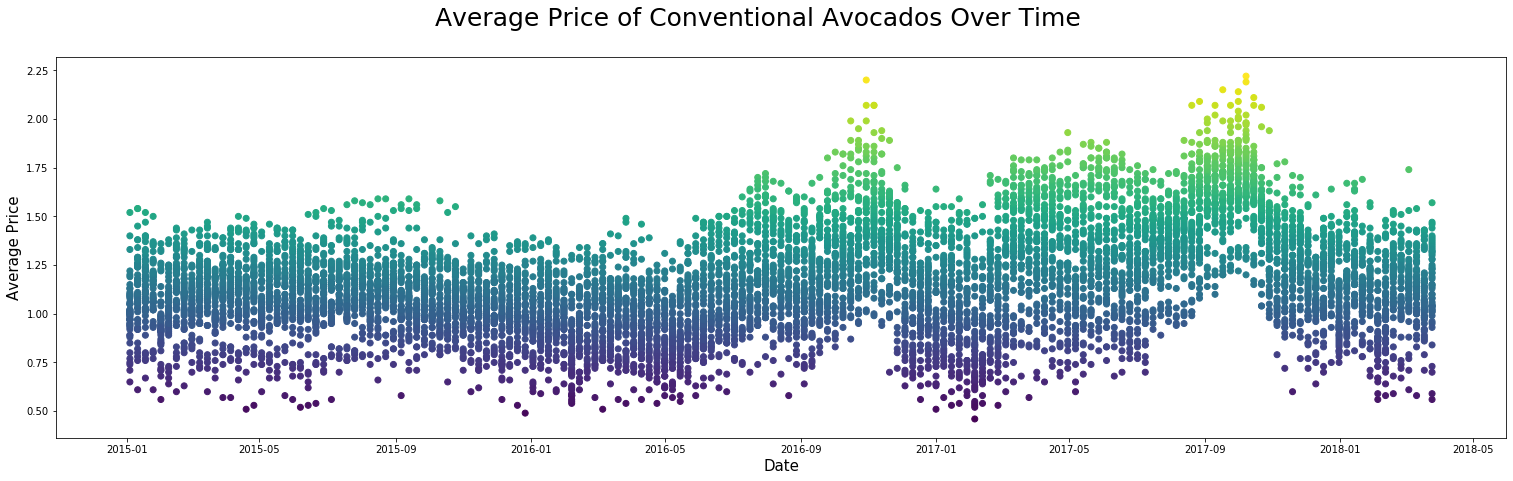

In [19]:
mask = data['type']== 'conventional'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Conventional Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)

dates = data[mask]['Date'].tolist()
avgPrices = data[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices)
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price', fontsize = 15)
plt.show()


The average price of avocado after 2016 for month between 09 to 01

##### Average price of organic Avocados over time

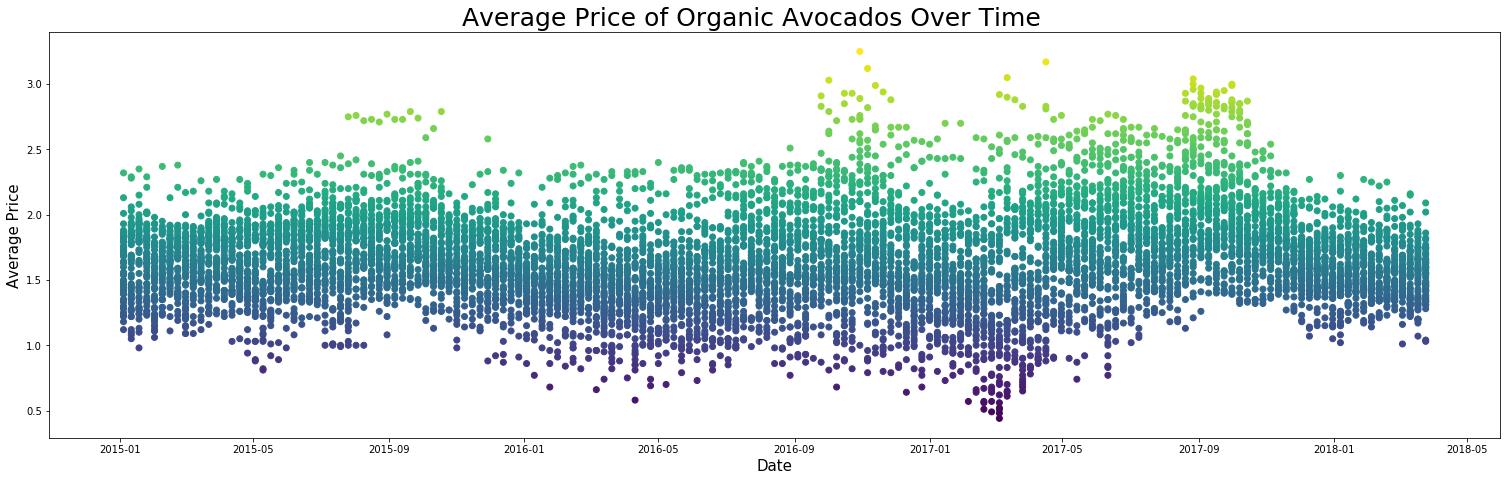

In [20]:
mask = data['type']== 'organic'
plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Organic Avocados Over Time', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = data[mask]['Date'].tolist()
avgPrices = data[mask]['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices)
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price', fontsize = 15)
plt.show()

In [21]:
data.region.value_counts()

Sacramento             338
Spokane                338
GrandRapids            338
SanDiego               338
CincinnatiDayton       338
NorthernNewEngland     338
NewOrleansMobile       338
SouthCarolina          338
West                   338
GreatLakes             338
StLouis                338
Boston                 338
Charlotte              338
TotalUS                338
MiamiFtLauderdale      338
Tampa                  338
Southeast              338
Portland               338
Detroit                338
Denver                 338
BuffaloRochester       338
NewYork                338
BaltimoreWashington    338
HarrisburgScranton     338
Plains                 338
Atlanta                338
RaleighGreensboro      338
Chicago                338
California             338
HartfordSpringfield    338
SouthCentral           338
LasVegas               338
DallasFtWorth          338
Roanoke                338
Midsouth               338
Indianapolis           338
Louisville             338
P

##### AVERAGE PRICE OF AVOCADO ACCORDING TO REGION

In [22]:
#create a region list
listr=list(data.region.unique())

In [23]:
#Finding the average price of avocado for each unique region

avg_price=[]
for i in listr:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    avg_price.append(region_average)

In [24]:
#converting the region and average price to dataframe
dataf=pd.DataFrame({'listr':listr,'avg_price':avg_price})

In [25]:
#Sorting the data
new_index=dataf.avg_price.sort_values(ascending=False).index.values
sorted_data=dataf.reindex(new_index)

Text(0.5, 1.0, 'Average Price of Avocado with respect to Region')

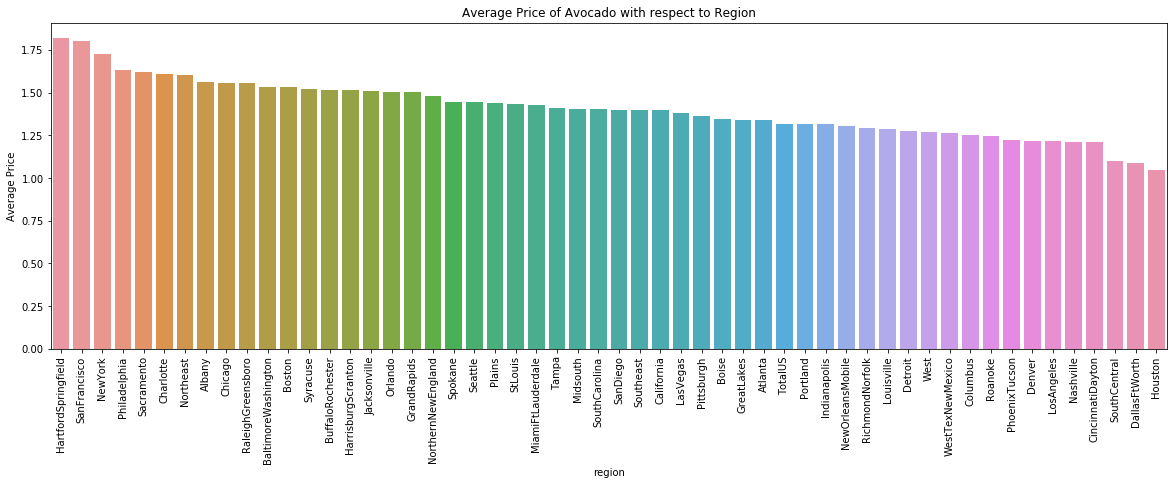

In [26]:
#Plotting the average price with respect to region

plt.figure(figsize=(20,6))
ax=sns.barplot(x=sorted_data.listr,y=sorted_data.avg_price)

plt.xticks(rotation=90)
plt.xlabel('region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado with respect to Region')

The above data is represent with average price and region.

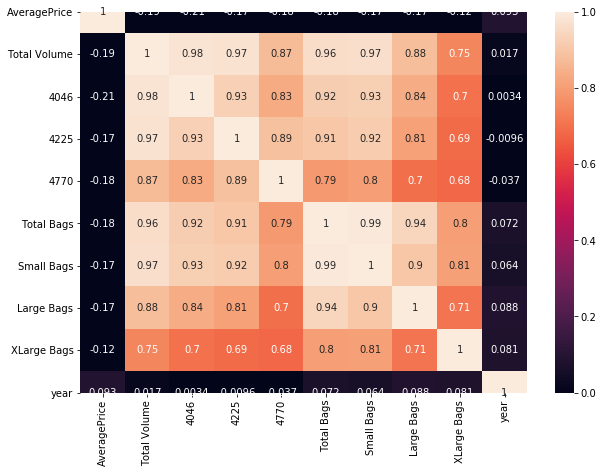

In [27]:
#Checkig correlatino of dataset
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

From the heatmap, the features are not correlated with AveragePrice. 

4046 is correlated with XLarge Bags. More are correlated with each other than AveragePrice which is output column.

In [28]:
#Describe the dataset

In [29]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The difference in max and 75% of XLarge Bags is very high 
The difference in max and 75% of Large Bag is very high 

In [30]:
#Encoding 

from sklearn.preprocessing import LabelEncoder as LE

le = LE()
data['type'] = le.fit_transform(data['type'])


In [31]:
data['region'] = le.fit_transform(data['region'])

In [32]:
#Converting date column into months and days, as we can observe that price is increasing with date

data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

In [33]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [34]:
#Droping date

data.drop(['Date','region'],inplace=True,axis=1)

In [35]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,29


<Figure size 1800x360 with 0 Axes>

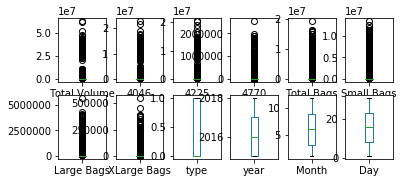

In [36]:
#Checking for outliers

#displaying box plot for outliers
plt.figure(figsize=(25,5))
data.iloc[:,1:].plot(kind='box',subplots=True,layout=(3,6))
plt.show()

Outliers are present in few column.

Lets remove outliers

In [37]:
#Removing outliers

from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [38]:
data.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

In [39]:
#Lets remove the skewness

for index in data.skew().index:
    if data.skew().loc[index]>0.5:
        data[index]=np.sqrt(data[index])

In [40]:
data.skew()

AveragePrice    0.377432
Total Volume    1.963864
4046            2.497504
4225            2.128505
4770            2.636658
Total Bags      2.010691
Small Bags      2.093752
Large Bags      2.236756
XLarge Bags     3.312484
type           -0.037741
year            0.229976
Month           0.107408
Day             0.011778
dtype: float64

### PREPARING DATA

In [42]:
x = data.iloc[:,1:]
y = data.AveragePrice

In [43]:
x.shape

(17651, 12)

In [44]:
ss=SS()
ss.fit(x)
x=ss.transform(x)

In [45]:
y.shape

(17651,)

### APPLYING REGRESSION ALGORITHM

In [46]:
#creating a function for testing and training 

def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    
    print('MAE:', mean_absolute_error(test_y, pred_y))
    print('MSE:', mean_squared_error(test_y, pred_y))
    print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))
    plt.figure(figsize=(6,4))
    sns.distplot(test_y - model.predict(test_x))
    plt.title('Distribution of residuals');
    plt.show()
    print("Plotting scatter plot with test and predicted data")
    plt.scatter(x=test_y,y=pred_y)
    plt.show()

#### LINEAR REGRESSION

Max R2 Score Corresponding to random state  46  is  52.0
MAE: 0.2090702701735057
MSE: 0.07079270377235965
RMSE: 0.26606898310844057


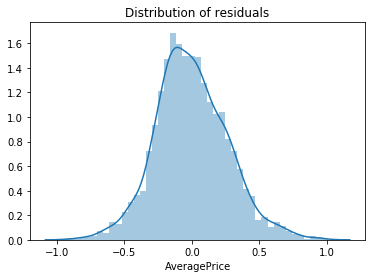

Plotting scatter plot with test and predicted data


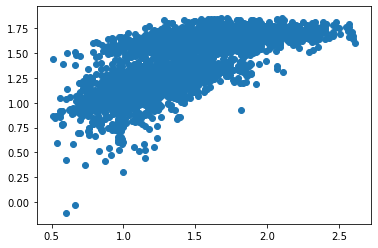

In [47]:
#Using train_test_split

lr= LR()
best_model(lr)

From the above observation, RMSE and MSE is very low and near to 0 for linear regression.

Lets check for Decission tree regressor

#### DTR

Max R2 Score Corresponding to random state  65  is  75.0
MAE: 0.1360322854715378
MSE: 0.04398558482016426
RMSE: 0.20972740598253786


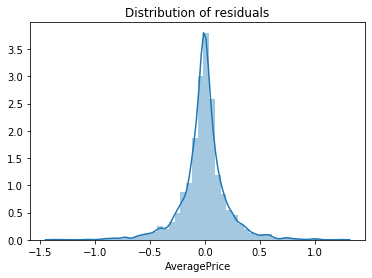

Plotting scatter plot with test and predicted data


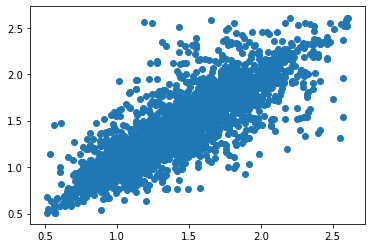

In [48]:
dtr = DTR()
best_model(dtr)

Using DTR we are getting good r2 score and low RMSE and MSE. also getting the best line.

### SAVING MODEL FOR REGRESSION

In [51]:
#dtr gave max score for random state = 65
dtr=DTR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=65)
dtr.fit(train_x,train_y)
pred_y = dtr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print('MAE:', mean_absolute_error(test_y, pred_y))
print('MSE:', mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))

R2 score is :  75.0
MAE: 0.12763806287170773
MSE: 0.03682925516850751
RMSE: 0.19190949733795748


FROM THE ABOVE ALL OBSERVATION WE ARE CONCLUDING WITH DTR AS IT GAVES US LOW RESIDUAL and RMSE scores. ALSO WE TRIED MULTIPLE ALGO SOME OF THEM NOT WORKED WITH DATA.
SO WE ARE SAVING DECISSION TREE REGRESSOR TO SAVE OUR FINAL MODEL.



In [53]:
joblib.dump(dtr, 'Project_8_Avocado_Prices_Regression.pkl')

['Project_8_Avocado_Prices_Regression.pkl']

### APPLYING CLASSIFICATION

In [84]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report

Preparing data

In [63]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,253.449443,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,2015,12,27
1,1.35,234.258362,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,2015,12,20
2,0.93,343.831674,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,2015,12,13
3,1.08,281.055422,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,2015,12,6
4,1.28,225.919455,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,2015,11,29


In [64]:
x = data.drop(['type'], axis = 1)
y = data.type


In [65]:
def best_model_classifier(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    

#### LOGISTIC REGRESSION

In [66]:
lor = LoR()
best_model_classifier(lor)

Max Accuracy Score Corresponding to random state  42  is  96.0


#### DTC

In [68]:
dtc = DTC()
best_model_classifier(dtc)

Max Accuracy Score Corresponding to random state  42  is  99.0


#### KNN

In [70]:
neighbors = {"n_neighbors":range(1,30)}
knn = KNC()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 7}

In [73]:
knn = KNC(n_neighbors=7)
best_model_classifier(knn)

Max Accuracy Score Corresponding to random state  43  is  99.0


#### RFC

In [74]:
rfc = RFC(n_estimators=50) 

param_grid = { 
    'n_estimators': [50, 100]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 100}

In [76]:
rfc=RFC(n_estimators=100)
best_model_classifier(rfc)

Max Accuracy Score Corresponding to random state  44  is  100.0


FROM THE ABOVE ALL OBSERVATION WE ARE CONCLUDING WITH RANDOM FOREST CLASSIFIER AS IT GAVES US HIGHEST ACCURACY SCORE.
SO WE ARE SAVING RANDOM FOREST CLASSIFIER TO SAVE OUR FINAL MODEL.



In [77]:
#RANDOM FOREST gave max score for random state = 44
rfc=RFC(n_estimators=100)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=44)
rfc.fit(train_x,train_y)
pred_y = rfc.predict(test_x)
accu_score = accuracy_score(test_y,pred_y)
accu_score = round(accu_score*100)
print("Accuracy score is : ", accu_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

Accuracy score is :  100.0
Confusion matrix is

[[1666    3]
 [   9 1853]]
Classification report 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1669
           1       1.00      1.00      1.00      1862

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



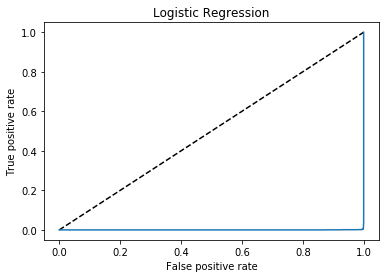

0.9966845020623114

In [87]:
#Decision Tree Classifier

y_pred_prob = rfc.predict_proba(test_x)[:,0]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random Forest")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score = roc_auc_score(test_y,rfc.predict(test_x))
auc_score

The RandomForestClassifier has the highest accuracy.

In [88]:
joblib.dump(rfc, 'Project_8_Avocado_Prices_Classification.pkl')

['Project_8_Avocado_Prices_Classification.pkl']